In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statistics import stdev
import scipy.stats as sp
from scipy.stats import median_abs_deviation, skew, kurtosis
from scipy.stats import norm, logistic, laplace
from scipy.stats import pearsonr
from scipy.special import erf
import seaborn as sns; sns.set()

In [2]:
def equalize(df): #funkcja ta skaluje ceny miedzi do cen za tonę
    d = 2204.623
    col_names = [col for col in df.columns][1:]
    col_names.remove('Volume')
    for name in col_names:
        df[name] = df[name]*d
    return df

def draw_stock(df, clr, title): #funkcja rysuje wykres cen
    fig, ax = plt.subplots(figsize = (15, 4))
    plt.xticks(rotation = 45)
    xloc = plt.MaxNLocator(9)
    ax.xaxis.set_major_locator(xloc)
    dates = df['Date'].values[::-1]
    prices = df['Open'].values[::-1]
    plt.plot(dates, prices, color = clr)
    plt.ylabel('USD')
    plt.title(title, fontsize = 25)
    plt.show()
    
def draw_ret(df, clr, title): #funkcja rysuje wykres log stóp zwrotu
    fig, ax = plt.subplots(figsize = (15, 4))
    plt.xticks(rotation = 45)
    xloc = plt.MaxNLocator(9)
    ax.xaxis.set_major_locator(xloc)
    dates = df['Date'].values[::-1][:-1]
    prices1 = df['Open'].values[::-1][1:]
    prices2 = df['Open'].values[::-1][:-1]
    r = np.log(prices1/prices2)
    plt.plot(dates, r, color = clr, lw=1)
    plt.title(title, fontsize = 25)
    plt.show()

# Przypomnienie

### Aluminium

In [3]:
aluminium_ = pd.read_csv('../data/aluminium.csv', sep = ',', encoding = 'latin-1') #ceny aluminium (przed ucięciem)
idx = aluminium_.index[aluminium_['Date'] == '07/01/2019'].tolist()[0] #idx = 952
aluminium = aluminium_.drop(aluminium_.index[(idx - 2):1259]) #ceny aluminium (po ucięciu)
aluminium

,Date,Close/Last,Volume,Open,High,Low
0,04/12/2023,2328.50,1205.0,2311.00,2335.00,2293.50
1,04/11/2023,2306.75,1979.0,2333.75,2335.50,2302.50
2,04/10/2023,2348.00,2215.0,2348.00,2348.00,2348.00
3,04/06/2023,2338.25,1373.0,2355.00,2359.50,2329.25
4,04/05/2023,2370.00,NaN,2370.00,2370.00,2370.00
...,...,...,...,...,...,...
945,07/11/2019,1865.00,5.0,1865.00,1865.00,1865.00
946,07/10/2019,1861.50,NaN,1861.50,1861.50,1861.50
947,07/09/2019,1853.50,15.0,1855.00,1875.00,1855.00
948,07/08/2019,1813.25,NaN,1813.25,1813.25,1813.25


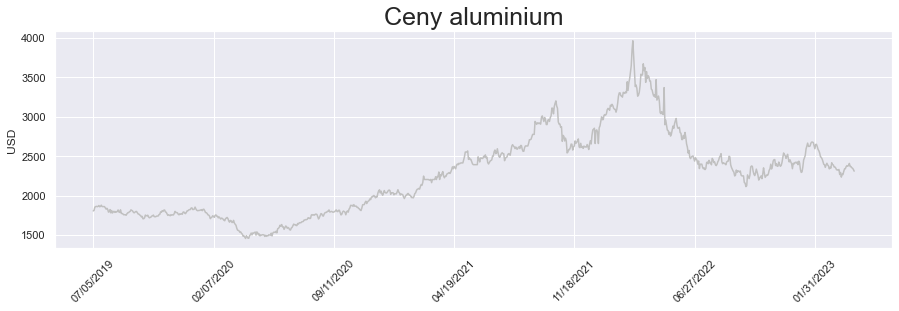

In [4]:
draw_stock(aluminium, 'silver', 'Ceny aluminium')

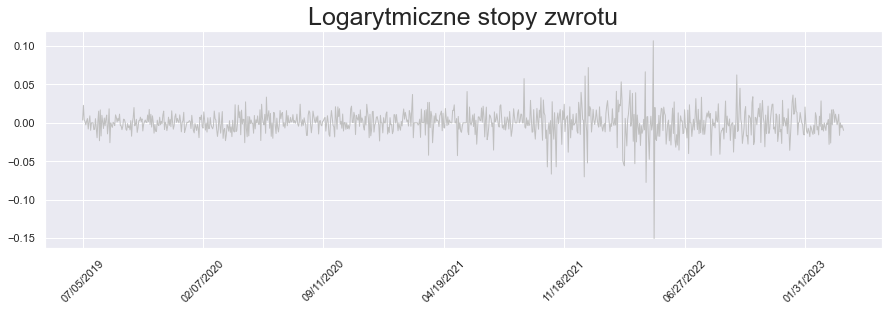

In [5]:
s_aluminium = np.array(aluminium['Open'].values)
r_aluminium = np.log(s_aluminium[1:]/s_aluminium[:-1]) #tu są logarytmiczne stopy zwrotu
t_aluminium = np.array([*range(len(r_aluminium))])
draw_ret(aluminium, 'silver', 'Logarytmiczne stopy zwrotu')

In [6]:
ss_aluminium = stdev(r_aluminium)
r_aluminium_sr = np.mean(r_aluminium)
print('Średnia: ' + str(np.mean(r_aluminium)))
print('Odchylenie standardowe: ' + str(stdev(r_aluminium)))
print('Korelacja: ' + str(np.corrcoef(r_aluminium, t_aluminium)[0][1]))
print('Przeciętna stopa zwrotu: ' + str(r_aluminium_sr))

Średnia: -0.000259379009600938
Odchylenie standardowe: 0.016536765157234286
Korelacja: -0.016641196537114555
Przeciętna stopa zwrotu: -0.000259379009600938


### Miedź

In [7]:
copper_ = pd.read_csv('../data/copper.csv', sep = ',', encoding = 'latin-1')
copper = equalize(copper_.drop(copper_.index[idx:1260]).drop(copper_.index[0:2]))

In [8]:
copper

,Date,Close/Last,Volume,Open,High,Low
2,04/12/2023,8997.066463,88325,8883.528378,9012.498824,8783.218032
3,04/11/2023,8861.482148,81243,8789.831901,8937.541642,8769.990294
4,04/10/2023,8766.683360,53745,8858.175214,8905.574609,8736.920949
5,04/06/2023,8852.663657,86075,8779.911098,8887.937625,8754.557933
6,04/05/2023,8788.729590,65931,8761.171802,8809.673508,8655.349898
...,...,...,...,...,...,...
947,07/11/2019,5924.924313,60433,5928.231247,5948.072854,5905.082705
948,07/10/2019,5939.254362,83259,5793.749244,5951.379789,5787.135375
949,07/09/2019,5787.135375,74241,5858.785623,5862.092557,5758.475276
950,07/08/2019,5862.092557,56450,5885.241099,5928.231247,5852.171754


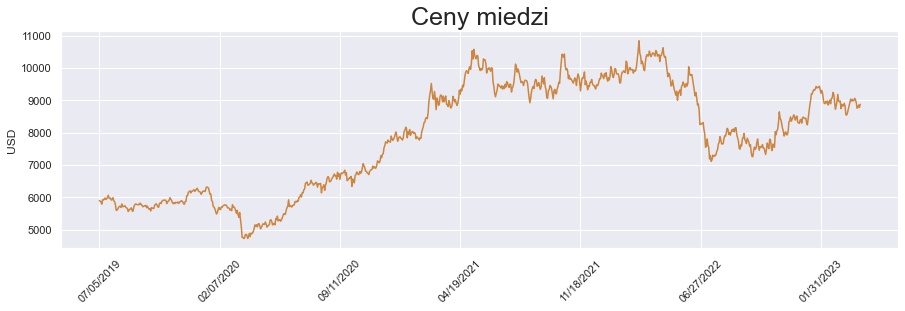

In [9]:
draw_stock(copper, 'peru', 'Ceny miedzi')

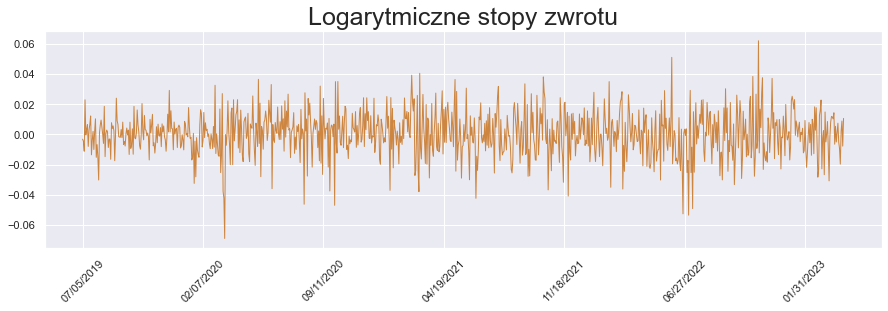

In [10]:
s_copper = np.array(copper['Open'].values)
r_copper = np.log(s_copper[1:]/s_copper[:-1]) #tu są logarytmiczne stopy zwrotu
t_copper = np.array([*range(len(r_copper))])
draw_ret(copper, 'peru', 'Logarytmiczne stopy zwrotu')

In [11]:
ss_copper = stdev(r_copper)
r_copper_sr = np.mean(r_copper)
print('Średnia: ' + str(np.mean(r_copper)))
print('Odchylenie standardowe: ' + str(stdev(r_copper)))
print('Korelacja: ' + str(np.corrcoef(r_copper, t_copper)[0][1]))
print('Przeciętna stopa zwrotu: ' + str(r_copper_sr))

Średnia: -0.0004305290321532628
Odchylenie standardowe: 0.014926237434109913
Korelacja: -0.014642310753235934
Przeciętna stopa zwrotu: -0.0004305290321532628


# Stopa zwrotu, ryzyko portfela

Ustalamy wagi portfela odpowiednio $w1 = 0,55$ dla miedzi, oraz $w2 = 0,45$ dla aluminium.

In [12]:
R1 = r_copper
R2 = r_aluminium
w1 = 0.55
w2 = 0.45

**Stopa zwrotu**
$$R_p = w_1R_1 + w_2R_2$$

In [13]:
Rp = w1*R1 + w2*R2

**Oczekiwana stopa zwrotu**
$$\text{E}[R_p] = w_1\text{E}[R_1] + w_2\text{E}[R_2]$$

In [14]:
Rp_sr = np.mean(Rp)
Rp_sr

-0.0003535115220047165

**Miary ryzyka**

In [15]:
sp = stdev(Rp)
print('Odchylenie standardowe: ' + str(stdev(Rp)))
print('Odchylenie przeciętne: ' + str(sum(abs(Rp - np.mean(Rp)))/len(Rp)))
print('Odchylenie ćwiartkowe: ' + str(1/2 * (np.quantile(Rp, .75) - np.quantile(Rp, .25))))

Odchylenie standardowe: 0.012341154886676633
Odchylenie przeciętne: 0.009154336769992073
Odchylenie ćwiartkowe: 0.006865774865488859


# Możliwe portfele

In [16]:
def portfolio(R1, R2):
    w1 = np.linspace(.01, .99, 99)
    w2 = 1 - w1
    E = []
    s = []
    for w1, w2 in zip(w1, w2):
        s.append(stdev(w1*R1 + w2*R2))
        E.append(w1*np.mean(R1) + w2 *np.mean(R2))
    s = np.array(s)
    E = np.array(E)
    idx = np.where(s == min(s))[0][0]
    E_min = E[idx]
    return s, E, min(s), E_min, idx

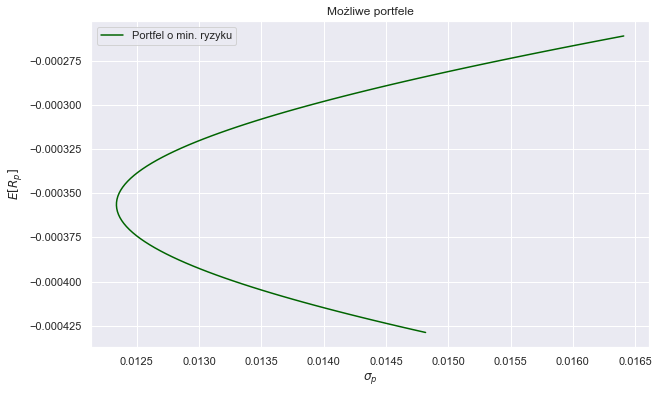

In [17]:
s, E, s_min, E_min, idx = portfolio(R1, R2)

fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(s, E, color = 'darkgreen', label = 'Portfel o min. ryzyku')
plt.title('Możliwe portfele')
plt.xlabel('$\sigma_p$')
plt.ylabel('$E[R_p]$')
plt.legend()
plt.show()

# Portfel o minimalnym ryzyku

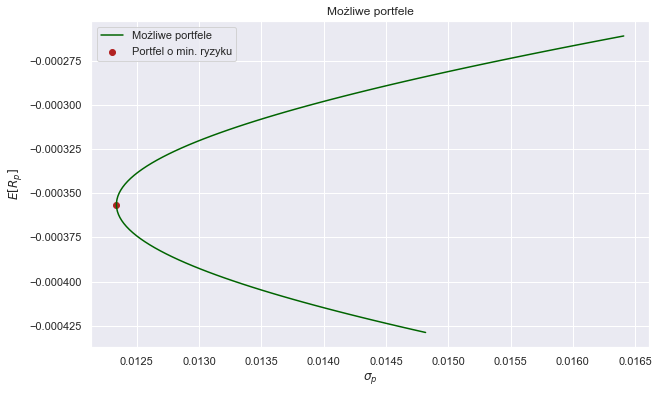

In [18]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(s, E, color = 'darkgreen', label = 'Możliwe portfele')
plt.scatter(s_min, E_min, color = 'firebrick', label = 'Portfel o min. ryzyku')
plt.title('Możliwe portfele')
plt.xlabel('$\sigma_p$')
plt.ylabel('$E[R_p]$')
plt.legend()
plt.show()

In [19]:
s_min, E_min

(0.012336746004776326, -0.00035693452245576316)

In [20]:
round(np.linspace(.01, .99, 99)[idx], 2) #waga 'minimalna' dla miedzi

0.57

In [21]:
round((1 - np.linspace(.01, .99, 99))[idx], 2) #waga 'minimalna' dla aluminium

0.43

Otrzymujemy portfel o minimalnym ryzyku dla wag odpowiednio 0,57 dla miedzi i 0,43 dla aluminium. Ryzyko takiego portfela wynosi w przybliżeniu 1,24% (zaokrąglam w górę).

# Portfel o minimalnym ryzyku przy ustalonej stopie zwrotu

In [22]:
def portfolio2(R1, R2, rate):
    w1 = np.linspace(.001, .999, 999)
    w2 = 1 - w1
    E = []
    s = []
    for w1, w2 in zip(w1, w2):
        s.append(stdev(w1*R1 + w2*R2))
        E.append(w1*np.mean(R1) + w2*np.mean(R2))
    s = np.array(s)
    E = np.array(E)
    d_rate = abs(E - rate)
    idx = np.where(d_rate == min(d_rate))[0][0]
    E_min = E[idx]
    return s, E, s[idx], E_min, idx

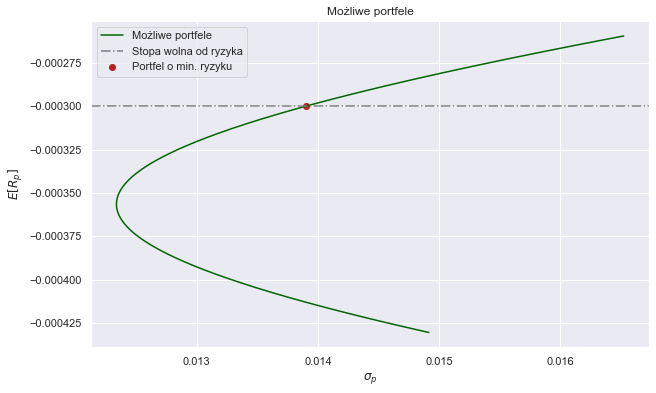

In [23]:
s, E, s_min, E_min, idx = portfolio2(R1, R2, -0.0003)

portfig, ax = plt.subplots(figsize = (10, 6))
plt.plot(s, E, color = 'darkgreen', label = 'Możliwe portfele')
plt.axline((min(s), E_min), (max(s), E_min), linestyle = 'dashdot', color = 'gray', 
          label = 'Stopa wolna od ryzyka')
plt.scatter(s_min, E_min, color = 'firebrick', label = 'Portfel o min. ryzyku')
plt.title('Możliwe portfele')
plt.xlabel('$\sigma_p$')
plt.ylabel('$E[R_p]$')
plt.legend()
plt.show()

In [24]:
s_min, E_min

(0.013903027982924582, -0.000299941564945839)

In [25]:
round(np.linspace(.001, .999, 999)[idx], 2) #waga 'minimalna' dla miedzi

0.24

In [26]:
round((1 - np.linspace(.001, .999, 999))[idx], 2) #waga 'minimalna' dla aluminium

0.76

# Portfel rynkowy

In [27]:
def portfolio3(R1, R2, R_f,wf):
    w1 = np.linspace(0, 1, 999)
    w2 = 1 - w1
    E = []
    s = []
    for w1, w2 in zip(w1, w2):
        
        s.append(stdev((w1*R1 + w2*R2)*(1-wf)+wf*R_f))
        E.append(np.mean((w1*R1 + w2*R2)*(1-wf)+wf*R_f))
    s = np.array(s)
    E = np.array(E)
    ss = (E - R_f)/s
    idx = np.where(max(ss))[0][0]
    E_max = E[idx]
    return s, E, s[idx], E_max, idx


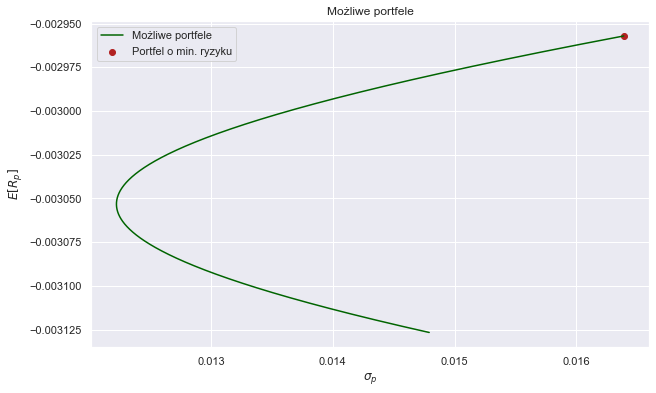

In [28]:
s, E, s_min, E_min, idx = portfolio3(R1, R2, -0.3,0.009)

portfig, ax = plt.subplots(figsize = (10, 6))
plt.plot(s, E, color = 'darkgreen', label = 'Możliwe portfele')
plt.scatter(s_min, E_min, color = 'firebrick', label = 'Portfel o min. ryzyku')
plt.title('Możliwe portfele')
plt.xlabel('$\sigma_p$')
plt.ylabel('$E[R_p]$')
plt.legend()
plt.show()

# MODEL JEDNOWSKAŹNIKOWY

### Jako trzecią zmienną bierzemy pod uwagę logarytmiczne stopy zwrotu ropy...

In [126]:
oil_ = pd.read_csv('../data/crudeoil.csv', sep = ',', encoding = 'latin-1') #ceny aluminium (przed ucięciem)
idx_oil_ = oil_.index[oil_['Date'] == '07/01/2019'].tolist()[0] #idx = 954
oil = oil_.drop(oil_.index[(idx_oil_ - 2):1261]).drop(oil_.index[0:2]) #ceny aluminium (po ucięciu)
num = oil._get_numeric_data()
neg_idx = num.index[num['Open'] < 0].tolist()[0] #752
num
oil['Open'] = oil['Open'].where(oil['Open'] > 0, (num.loc[751, "Open"] + num.loc[753, "Open"])/2)

In [127]:
oil[750:753]

,Date,Close/Last,Volume,Open,High,Low
752,04/20/2020,-37.63,148427,15.675,-35.20,-40.32
753,04/17/2020,18.27,213600,20.000,20.22,17.31
754,04/16/2020,19.75,319273,20.150,20.53,19.42


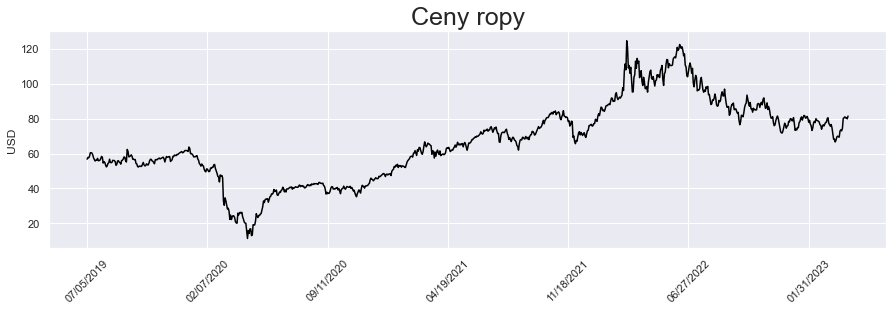

In [128]:
draw_stock(oil, 'black', 'Ceny ropy')

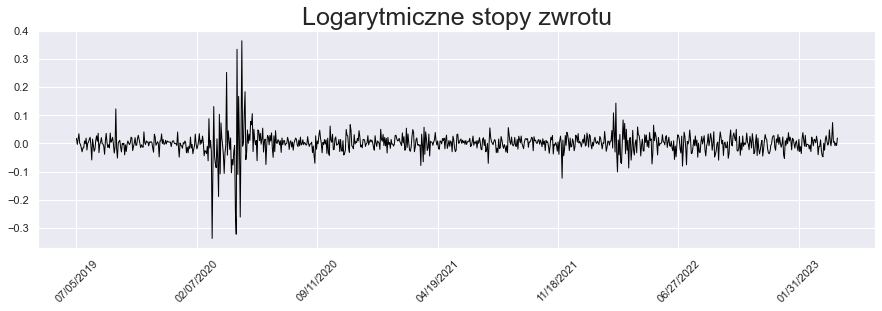

In [129]:
s_oil = np.array(oil['Open'].values)
r_oil = np.log(s_oil[1:]/s_oil[:-1]) #tu są logarytmiczne stopy zwrot
t_oil = np.array([*range(len(r_oil))])
draw_ret(oil, 'black', 'Logarytmiczne stopy zwrotu')

In [160]:
def corr(R1, R2, title, show = False):
    sx = stdev(R1)
    sy = stdev(R2)
    r = 1/(len(R1) - 1)*((sum((R1 - np.mean(R1))*(R2 - np.mean(R2))))/(sx*sy))
    
    a = r*sy/sx
    b = np.mean(R2) - r*np.mean(R1)*sy/sx
    
    if show:
        fig, ax = plt.subplots(figsize = (12, 8))
        plt.scatter(R1, R2, color = 'g', edgecolors = 'black', linewidth = 1)
        plt.plot(R1, a*R1 + b, color = 'crimson', label = 'Prosta regresji')
        plt.legend()
        plt.title(title, fontsize = 20)
        plt.show()
    return a, b

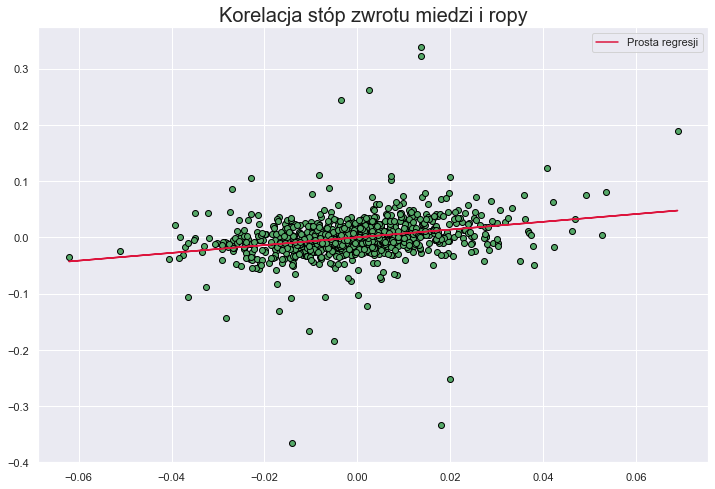

(0.6905802811063264, -8.330779162735158e-05)

In [161]:
corr(r_copper, r_oil, 'Korelacja stóp zwrotu miedzi i ropy', True)

In [166]:
print('Korelacja miedź-ropa: ' + str(np.corrcoef(r_copper, r_oil)[0][1]))

Korelacja miedź-ropa: 0.2592009662315715


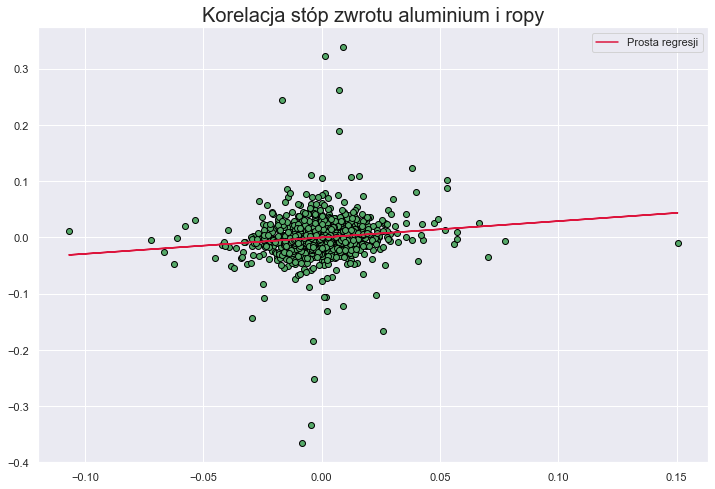

(0.2908894328536791, -0.00030517203867922067)

In [162]:
corr(r_aluminium, r_oil, 'Korelacja stóp zwrotu aluminium i ropy', True)

In [165]:
print('Korelacja aluminium-ropa: ' + str(np.corrcoef(r_aluminium, r_oil)[0][1]))

Korelacja aluminium-ropa: 0.12096245734824984
